# Информация о датасете

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [19]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [20]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

ID - ID пациента

Diabetes_012 - Диабет (0 = нет диабета, 1 = преддиабет или диабет)

HighBP - Высокое давление (0 = нет, 1 = есть)

HighChol - Высокий холестерин (0 = нет, 1 = есть)

CholCheck - Проверка холестерина за последние 5 лет (0 = не проверял, 1 = проверял)

BMI - Индекс массы тела (ИМТ)

Smoker - Курильщик (выкурил ли хотя бы 100 сигарет за всю жизнь) (0 = нет, 1 = да)

Stroke - Инсульт (0 = не было, 1 = было)

HeartDiseaseorAttack - Болезнь сердца или инфаркт (0 = нет, 1 = есть)

PhysActivity - Физическая активность за последние 30 дней (не включая работу) (0 = нет, 1 = да)

Fruits - Употребление фруктов 1+ раз в день (0 = нет, 1 = да)

Veggies - Употребление овощей 1+ раз в день (0 = нет, 1 = да)

HvyAlcoholConsump - Злоупотребление алкоголем (мужчины: более 14 порций в неделю, женщины: более 7 порций) (0 = нет, 1 = да)

AnyHealthcare - Наличие медицинской страховки (0 = нет, 1 = есть)

NoDocbcCost - Не мог обратиться к врачу из-за стоимости в последние 12 месяцев (0 = нет, 1 = да)

GenHlth - Общая оценка здоровья (шкала 1-5: 1 = отлично, 2 = очень хорошо, 3 = хорошо, 4 = удовлетворительно, 5 = плохо)

MentHlth - Дней с плохим психическим здоровьем за последние 30 дней (шкала 1-30)

PhysHlth - Дней с плохим физическим здоровьем за последние 30 дней (шкала 1-30)

DiffWalk - Серьезные трудности при ходьбе или подъеме по лестнице (0 = нет, 1 = да)

Sex - Пол (0 = женщина, 1 = мужчина)

Age - Возрастная категория (13 уровней: 1 = 18-24, 9 = 60-64, 13 = 80+)

Education - Уровень образования (шкала 1-6: 1 = не посещал школу, 2 = 1-8 классы, 3 = 9-11 классы, 4 = 12 класс или аттестат, 5 = 1-3 года колледжа, 6 = 4+ года колледжа)

Income - Уровень дохода (шкала 1-8: 1 = менее 10,000, 5 = менее 35,000, 8 = 75,000+)

# Анализ дубликатов

Этот датасет - анонимный опрос BRFSS, поэтому в нем нет персональных идентификаторов.

Мы не можем отличить двух разных людей с одинаковыми характеристиками и технические дубликаты/ошибки.

In [22]:
duplicate_counts = df.groupby(list(df.columns)).size().reset_index(name='count')
duplicates = duplicate_counts[duplicate_counts['count'] > 1]

print(str(len(duplicates)) + ' уникальных комбинаций, которые повторяются')
print('Всего записей-дубликатов: ' + str(duplicates['count'].sum() - len(duplicates)))

11187 уникальных комбинаций, которые повторяются
Всего записей-дубликатов: 23899


В исходном датасете обнаружено 23 899 полных дубликатов (9,4% от общего объёма 253 680 записей). Эти записи представляют собой абсолютно идентичные строки по всем 22 признакам, включая целевой показатель Diabetes_012.

Давайте посмотрим, какова вероятность того, что дубликаты - разные люди

In [23]:
# для бинарных признаков (0/1) - вероятность 0.5
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# для категориальных с k категориями - вероятность 1/k
probabilities = {
    'GenHlth': 1/5, # 5 категорий (1-5)
    'MentHlth': 1/31, # 0-30 дней
    'PhysHlth': 1/31, # 0-30 дней
    'Age': 1/13, # 13 возрастных групп
    'Education': 1/6, # 6 уровней образования
    'Income': 1/8, # 8 уровней дохода
    'BMI': 1/50, # примерный диапазон BMI (15-65)
}

# рассчитаем общую вероятность совпадения 22 признаков
prob_binary = 0.5 ** len(binary_cols) # все бинарные признаки совпали
prob_categorical = np.prod(list(probabilities.values())) # все категориальные совпали
prob_total = prob_binary * prob_categorical

print(f"Вероятность совпадения всех бинарных признаков: {prob_binary:.2e}")
print(f"Вероятность совпадения всех категориальных признаков: {prob_categorical:.2e}")
print(f"Общая вероятность совпадения ВСЕХ 22 признаков: {prob_total:.2e}")
print(f"Это 1 шанс из {1/prob_total:.0e}")

Вероятность совпадения всех бинарных признаков: 6.10e-05
Вероятность совпадения всех категориальных признаков: 6.67e-09
Общая вероятность совпадения ВСЕХ 22 признаков: 4.07e-13
Это 1 шанс из 2e+12


При анализе выборки BRFSS 2015 года такие полные совпадения статистически крайне маловероятны для независимых наблюдений. Это указывает на артефакт сбора или обработки данных, а не на реальных пациентов с одинаковыми характеристиками. Удаление этих записей устранит систематическую ошибку и повысит достоверность анализа.

Теперь посмотрим, повлияет ли удаление дубликатов на распределение.

In [24]:
print(f"Всего строк: {len(df)}")
print(f"Полных дубликатов: {len(df[df.duplicated()])}")

# проверим влияние удаления всех дубликатов (оставляем по 1)
df_unique = df.drop_duplicates()
print(f"Было: {len(df)} записей")
print(f"После удаления дубликатов: {len(df_unique)} записей")
print(f"Удалится записей: {len(df) - len(df_unique)}")

# сравним распределение Diabetes_012
before = df['Diabetes_012'].value_counts(normalize=True).sort_index()
after = df_unique['Diabetes_012'].value_counts(normalize=True).sort_index()

print(f"\nРаспределение Diabetes_012:")
print(f"{'Класс':<10} {'ДО':<10} {'ПОСЛЕ':<10} {'Разница':<10}")
for i in range(len(before)):
    diff = after.iloc[i] - before.iloc[i]
    print(f"{before.index[i]:<10} {before.iloc[i]:<10.4f} {after.iloc[i]:<10.4f} {diff:>10.4f}")

Всего строк: 253680
Полных дубликатов: 23899
Было: 253680 записей
После удаления дубликатов: 229781 записей
Удалится записей: 23899

Распределение Diabetes_012:
Класс      ДО         ПОСЛЕ      Разница   
0.0        0.8424     0.8271        -0.0153
1.0        0.0183     0.0201         0.0019
2.0        0.1393     0.1527         0.0134


In [25]:
df = df_unique
df_unique.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Можно сказать "распределение изменилось умеренно", но это все равно значимо для точного анализа. Главный аргумент для удаления — математическая невозможность одинаковых людей, а не величина изменения распределения.

Удаляем не потому что "почти не поменялось", а потому что это технические дубли (вероятность случайности ~10⁻¹³). Они искажают реальную распространённость диабета, нарушают принцип независимости наблюдений для статистических тестов.
То, что распределение изменилось (меньше здоровых профилей, больше диабетиков) — как раз подтверждает необходимость удаления, а не наоборот.

# Комбинаторные срезы
Цель — оценить, как доля людей с  деабетом (Diabetes_binary = 1) различается между подгруппами по возрасту, BMI(ожирение) и двум факторам: физическая активность и финансовый барьер к врачу.

In [26]:
df_my = df_unique.copy()

In [27]:
# Целевая: 1 — диабет (Diabetes_012 = 2), 0 — иначе
df_my["Diabetes_binary"] = (df_my["Diabetes_012"] == 2).astype(int)

df_my["age_group"] = np.where(df_my["Age"] >= 7, "Age ≥ 45", "Age < 45")

df_my["bmi_group"] = np.where(df_my["BMI"] >= 30, "BMI ≥ 30", "BMI < 30")

cols_needed = ["Diabetes_binary", "PhysActivity", "NoDocbcCost", "age_group", "bmi_group"]
print(df_my[cols_needed].isna().sum())

Diabetes_binary    0
PhysActivity       0
NoDocbcCost        0
age_group          0
bmi_group          0
dtype: int64


- Возрастные группы: Age < 45 и Age ≥ 45 (в датасете переменная Age закодирована категориями: 45+ соответствует Age ≥ 7).
- Группы BMI: BMI < 30 и BMI ≥ 30 (порог ожирения).
- Показатель интереса: доля диабета в группе рассчитывается как среднее значение Diabetes_binary (для бинарной переменной это эквивалентно доле единиц).

PhysActivity × BMI group: сравнение доли Diabetes_binary = 1 между физически активными и неактивными отдельно в группах BMI < 30 и BMI ≥ 30.

NoDocbcCost × Age group: сравнение доли Diabetes_binary = 1 между людьми с финансовым барьером к врачу и без него отдельно в группах Age < 45 и Age ≥ 45.

In [28]:
# Доля диабета = среднее Diabetes_binary внутри группы
tab_pa_bmi = (df_my
              .groupby(["PhysActivity", "bmi_group"])["Diabetes_binary"]
              .agg(['mean', 'count'])
              .reset_index()
              .rename(columns={'mean': 'diabetes_share', 'count': 'n'}))#n — количество наблюдений в соответствующей группе.

# Переводим 0/1 в понятные подписи
tab_pa_bmi["PhysActivity"] = tab_pa_bmi["PhysActivity"].map({1: "Физ. активность: Да",
                                                             0: "Физ. активность: Нет"})

tab_pa_bmi

,PhysActivity,bmi_group,diabetes_share,n
0,Физ. активность: Нет,BMI < 30,0.138213,33065
1,Физ. активность: Нет,BMI ≥ 30,0.300230,28205
2,Физ. активность: Да,BMI < 30,0.090128,111774
3,Физ. активность: Да,BMI ≥ 30,0.211238,56737


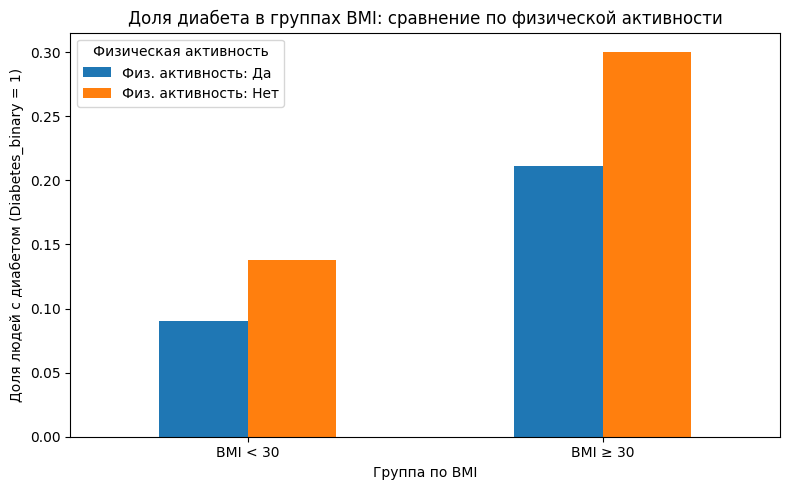

,bmi_group,PhysActivity,diabetes_share,n
0,BMI < 30,Физ. активность: Нет,0.138213,33065
1,BMI ≥ 30,Физ. активность: Нет,0.300230,28205
2,BMI < 30,Физ. активность: Да,0.090128,111774
3,BMI ≥ 30,Физ. активность: Да,0.211238,56737


In [29]:
# Таблица для графика: строки — BMI-группы, столбцы — физ. активность
p1 = tab_pa_bmi.pivot(index="bmi_group", columns="PhysActivity", values="diabetes_share")

ax = p1.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Доля людей с диабетом (Diabetes_binary = 1)")
plt.xlabel("Группа по BMI")
plt.title("Доля диабета в группах BMI: сравнение по физической активности")
plt.xticks(rotation=0)
plt.legend(title="Физическая активность")
plt.tight_layout()
plt.show()

# Размеры групп n для понимания
tab_pa_bmi[["bmi_group", "PhysActivity", "diabetes_share", "n"]]

- В группе BMI ≥ 30 доля диабета заметно выше, чем в BMI < 30.
- Внутри каждой BMI-группы у людей с физической активностью “Да” доля диабета ниже, чем у “Нет”.
- Разница между “Да/Нет” особенно заметна при BMI ≥ 30.

Гипотезы:
H1 (ожирение):

- У людей с BMI ≥ 30 доля диабета выше, чем у людей с BMI < 30. 

H2 (активность):

- У физически активных людей доля диабета ниже, чем у неактивных.

H3 (взаимодействие, “сложная”):

- Эффект физической активности сильнее у людей с BMI ≥ 30: разница в доле диабета между активными и неактивными больше в группе ожирения.

In [30]:
tab_cost_age = (df_my
                .groupby(["NoDocbcCost", "age_group"])["Diabetes_binary"]
                .agg(diabetes_share="mean", n="count")
                .reset_index())

tab_cost_age["NoDocbcCost"] = tab_cost_age["NoDocbcCost"].map({
    0: "Барьер по стоимости: Нет",
    1: "Барьер по стоимости: Да"
})

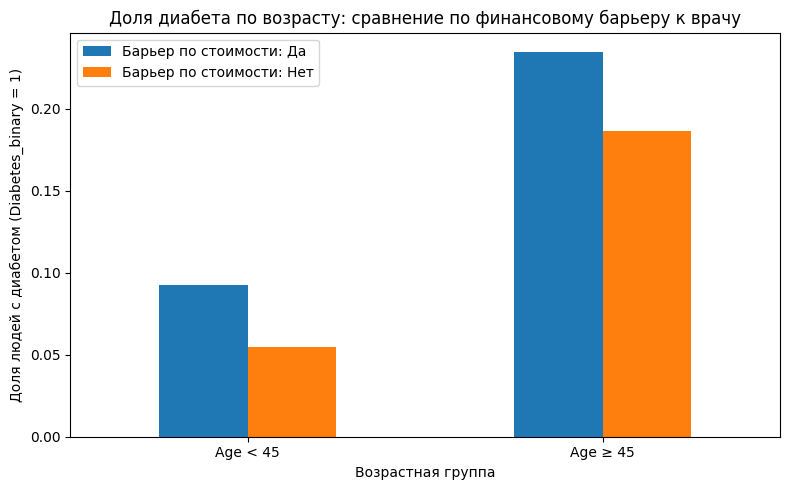

,age_group,NoDocbcCost,diabetes_share,n
0,Age < 45,Барьер по стоимости: Нет,0.054513,57289
1,Age ≥ 45,Барьер по стоимости: Нет,0.186762,151166
2,Age < 45,Барьер по стоимости: Да,0.092595,8899
3,Age ≥ 45,Барьер по стоимости: Да,0.234811,12427


In [31]:
p2 = tab_cost_age.pivot(index="age_group", columns="NoDocbcCost", values="diabetes_share")

ax = p2.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Доля людей с диабетом (Diabetes_binary = 1)")
plt.xlabel("Возрастная группа")
plt.title("Доля диабета по возрасту: сравнение по финансовому барьеру к врачу")
plt.xticks(rotation=0)
plt.legend(title="")
plt.tight_layout()
plt.show()

# таблица с n
tab_cost_age[["age_group", "NoDocbcCost", "diabetes_share", "n"]]

- В группе Age ≥ 45 доля диабета сильно выше, чем в Age < 45.
- В обеих возрастных группах те, кто отвечал “не смог позволить врача (стоимость)”, имеют более высокую долю диабета.
- И у 45+ эта доля в целом выше в обоих столбиках.

Гипотезы

H4 (возраст):

- У людей в группе Age ≥ 45 доля диабета выше, чем у людей Age < 45.

H5 (барьер по стоимости):

- У людей, которые не смогли посетить врача из-за стоимости (NoDocbcCost=Yes), доля диабета выше, чем у тех, у кого такого барьера не было.

H6 (сложная):

- Разница “NoDocbcCost Yes vs No” сильнее выражена в группе Age ≥ 45 (то есть возраст усиливает связь барьера с диабетом).